In [100]:
import numpy as np
import pandas as pd
import os

#parameters
n_obs_per_clust = 300
n_features = 10
n_clusters = 3

# Initialize the data matrix
X = np.zeros((n_obs_per_clust * n_clusters, n_features))

#generate data for each cluster
#cluster 1
X[0:n_obs_per_clust, 0] = np.random.binomial(1, 0.1, n_obs_per_clust)  # low
X[0:n_obs_per_clust, 1] = np.random.binomial(1, 0.08, n_obs_per_clust)
X[0:n_obs_per_clust, 2] = np.random.binomial(1, 0.12, n_obs_per_clust)
X[0:n_obs_per_clust, 3] = np.random.binomial(1, 0.3, n_obs_per_clust)  # med
X[0:n_obs_per_clust, 4] = np.random.binomial(1, 0.34, n_obs_per_clust)
X[0:n_obs_per_clust, 5] = np.random.binomial(1, 0.25, n_obs_per_clust)
X[0:n_obs_per_clust, 6] = np.random.binomial(1, 0.7, n_obs_per_clust)  # high
X[0:n_obs_per_clust, 7] = np.random.binomial(1, 0.6, n_obs_per_clust)
X[0:n_obs_per_clust, 8] = np.random.binomial(1, 0.8, n_obs_per_clust)
X[0:n_obs_per_clust, 9] = np.random.binomial(1, 0.9, n_obs_per_clust)

#cluster 2
start, end = n_obs_per_clust, 2 * n_obs_per_clust
X[start:end, 0] = np.random.binomial(1, 0.68, n_obs_per_clust)  # high
X[start:end, 1] = np.random.binomial(1, 0.8, n_obs_per_clust)
X[start:end, 2] = np.random.binomial(1, 0.8, n_obs_per_clust)
X[start:end, 3] = np.random.binomial(1, 0.3, n_obs_per_clust)  # med
X[start:end, 4] = np.random.binomial(1, 0.34, n_obs_per_clust)
X[start:end, 5] = np.random.binomial(1, 0.25, n_obs_per_clust)
X[start:end, 6] = np.random.binomial(1, 0.02, n_obs_per_clust)  # low
X[start:end, 7] = np.random.binomial(1, 0.35, n_obs_per_clust)
X[start:end, 8] = np.random.binomial(1, 0.25, n_obs_per_clust)
X[start:end, 9] = np.random.binomial(1, 0.13, n_obs_per_clust)

#cluster 3
start, end = 2 * n_obs_per_clust, 3 * n_obs_per_clust
X[start:end, 0] = np.random.binomial(1, 0.11, n_obs_per_clust)  # low
X[start:end, 1] = np.random.binomial(1, 0.02, n_obs_per_clust)
X[start:end, 2] = np.random.binomial(1, 0.2, n_obs_per_clust)
X[start:end, 3] = np.random.binomial(1, 0.8, n_obs_per_clust)  # high
X[start:end, 4] = np.random.binomial(1, 0.7, n_obs_per_clust)
X[start:end, 5] = np.random.binomial(1, 0.65, n_obs_per_clust)
X[start:end, 6] = np.random.binomial(1, 0.1, n_obs_per_clust)  # low
X[start:end, 7] = np.random.binomial(1, 0.2, n_obs_per_clust)
X[start:end, 8] = np.random.binomial(1, 0.15, n_obs_per_clust)
X[start:end, 9] = np.random.binomial(1, 0.02, n_obs_per_clust)

#convert to DataFrame
columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
df = pd.DataFrame(X, columns=columns)

#save to CSV
desktop_path = "/Users/liumeicheng/Desktop/example_dataset_1.csv" 
df.to_csv(desktop_path, index=False)

print(f"Dataset saved to {desktop_path}")



Dataset saved to /Users/liumeicheng/Desktop/example_dataset_1.csv


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
import umap

In [104]:
df = pd.read_csv("/Users/liumeicheng/Desktop/example_dataset_1.csv")
#transpose data so that rows equal to symptoms and columns equal to samples
X_features = df.T
X

array([[0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(900, 10))

In [106]:
#compute Jaccard distance matrix
dist_matrix = pdist(X_features, metric='jaccard')
dist_square = squareform(dist_matrix)
dist_matrix

array([0.60215054, 0.59198113, 0.82073814, 0.82525952, 0.83703704,
       0.95277207, 0.82633588, 0.86971831, 0.91509434, 0.52512563,
       0.87201365, 0.85641026, 0.87226277, 0.96049896, 0.84099617,
       0.86126126, 0.91762452, 0.8       , 0.79092382, 0.80378657,
       0.9412844 , 0.78863233, 0.84902597, 0.89119171, 0.63333333,
       0.64373898, 0.85789474, 0.78651685, 0.79166667, 0.84142395,
       0.66034483, 0.83156028, 0.75974026, 0.79236641, 0.82658023,
       0.86988848, 0.80769231, 0.81028939, 0.86890756, 0.69230769,
       0.58956916, 0.46685083, 0.6461825 , 0.65306122, 0.50976139])

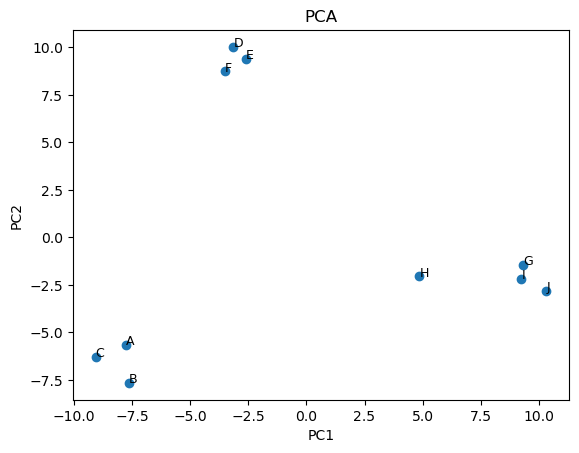

In [108]:
#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_features)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i, label in enumerate(df.columns):
    plt.text(X_pca[i, 0], X_pca[i, 1], label, fontsize=9)
plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


/Users/liumeicheng/opt/anaconda3/envs/symptom-umap/lib/python3.10/site-packages/umap/umap_.py:1887: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/Users/liumeicheng/opt/anaconda3/envs/symptom-umap/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


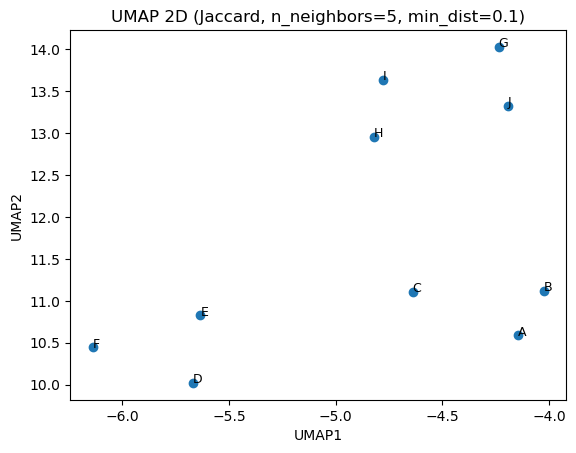

In [110]:
#umap 2d (using Jaccard distance)
n_neighbors = 5
min_dist = 0.1
umap_model = umap.UMAP(
    n_components=2,
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    metric='jaccard',
    random_state=42
)
X_umap = umap_model.fit_transform(X_features)

plt.figure()
plt.scatter(X_umap[:, 0], X_umap[:, 1])
for i, label in enumerate(df.columns):
    plt.text(X_umap[i, 0], X_umap[i, 1], label, fontsize=9)
plt.title(f"UMAP 2D (Jaccard, n_neighbors={n_neighbors}, min_dist={min_dist})")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()


/Users/liumeicheng/opt/anaconda3/envs/symptom-umap/lib/python3.10/site-packages/umap/umap_.py:1887: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/Users/liumeicheng/opt/anaconda3/envs/symptom-umap/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


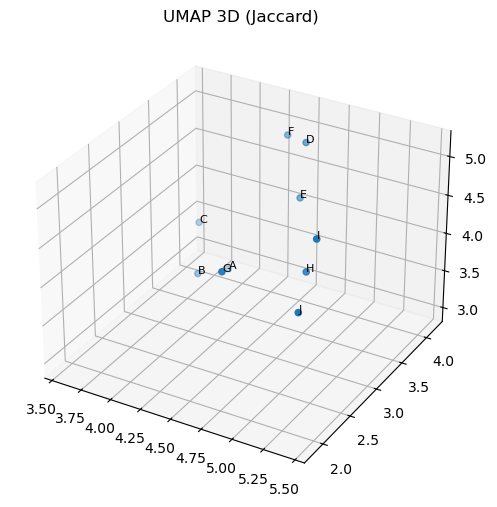

In [112]:
#umap 3d plotting function
def draw_umap(X, n_neighbors=5, min_dist=0.1, n_components=3, title='UMAP 3D'):
    umap_model = umap.UMAP(
        n_components=n_components,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric='jaccard',
        random_state=42
    )
    X_umap = umap_model.fit_transform(X)

    if n_components == 3:
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_umap[:, 0], X_umap[:, 1], X_umap[:, 2])
        for i, label in enumerate(df.columns):
            ax.text(X_umap[i, 0], X_umap[i, 1], X_umap[i, 2], label, fontsize=8)
        ax.set_title(title)
        plt.show()
    else:
        plt.scatter(X_umap[:, 0], X_umap[:, 1])
        for i, label in enumerate(df.columns):
            plt.text(X_umap[i, 0], X_umap[i, 1], label, fontsize=9)
        plt.title(title)
        plt.show()

draw_umap(X_features, n_neighbors=5, min_dist=0.1, n_components=3, title='UMAP 3D (Jaccard)')

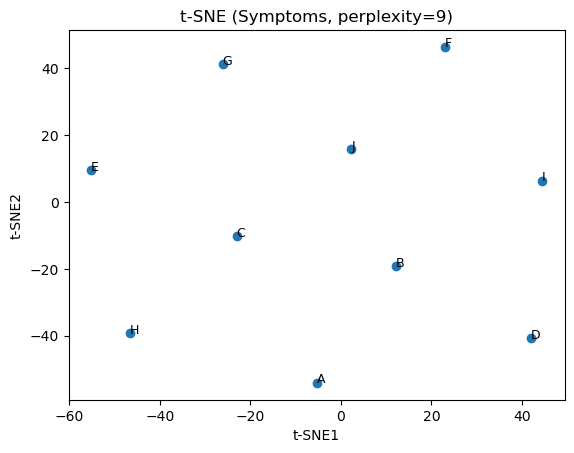

In [114]:
#t-SNE (auto adjust perplexity)
perplexity_value = min(30, len(df.columns) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
X_tsne = tsne.fit_transform(X_features)

plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
for i, label in enumerate(df.columns):
    plt.text(X_tsne[i, 0], X_tsne[i, 1], label, fontsize=9)
plt.title(f"t-SNE (Symptoms, perplexity={perplexity_value})")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.show()


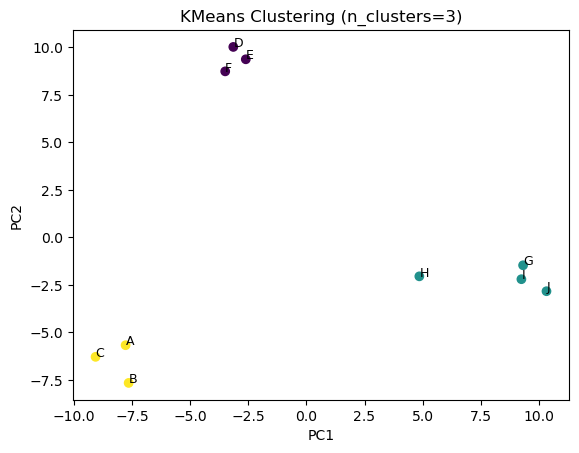

In [116]:
#k-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_kmeans = kmeans.fit_predict(X_features)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis')
for i, label in enumerate(df.columns):
    plt.text(X_pca[i, 0], X_pca[i, 1], label, fontsize=9)
plt.title(f"KMeans Clustering (n_clusters={n_clusters})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

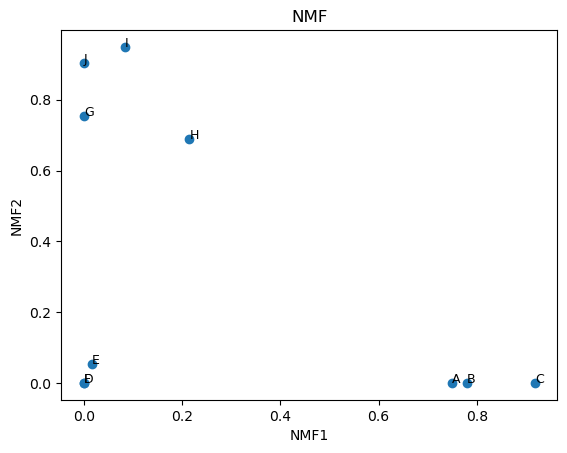

In [118]:
#nmf
nmf = NMF(n_components=3, random_state=42)
X_nmf = nmf.fit_transform(np.maximum(X_features.values, 0))

plt.figure()
plt.scatter(X_nmf[:, 0], X_nmf[:, 1])
for i, label in enumerate(df.columns):
    plt.text(X_nmf[i, 0], X_nmf[i, 1], label, fontsize=9)
plt.title("NMF")
plt.xlabel("NMF1")
plt.ylabel("NMF2")
plt.show()

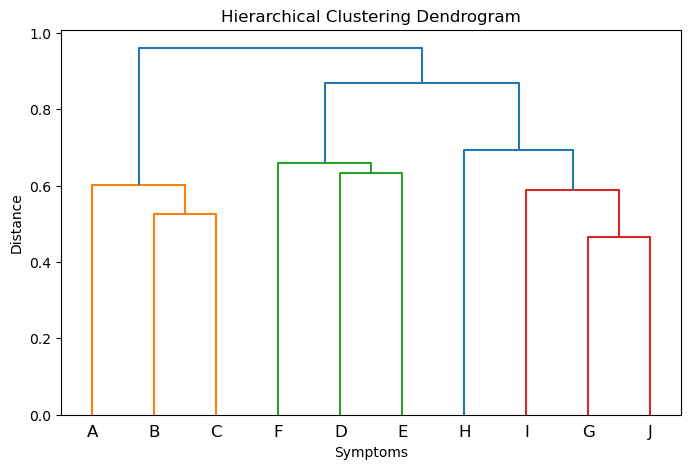

In [120]:
#hierarchical clustering (jaccard)
Z = linkage(dist_matrix, method='complete')

plt.figure(figsize=(8, 5))
dendrogram(Z, labels=df.columns)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Symptoms")
plt.ylabel("Distance")
plt.show()

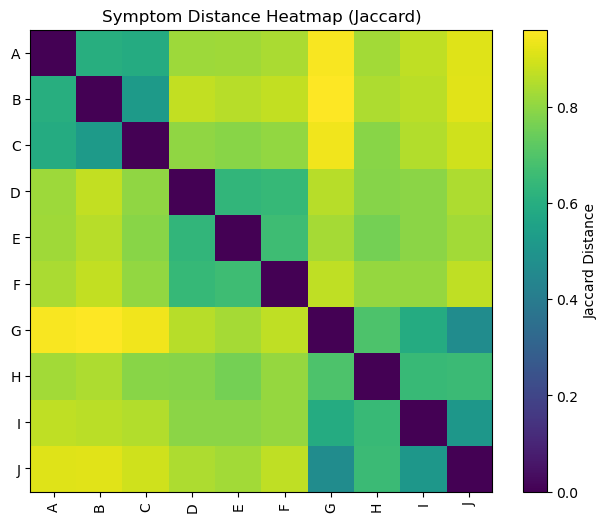

In [122]:
#heatmap (Jaccard)
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(dist_square, cmap='viridis')
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.columns)))
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.xticks(rotation=90)
cbar = plt.colorbar(im)
cbar.set_label('Jaccard Distance')
plt.title("Symptom Distance Heatmap (Jaccard)")
plt.show()


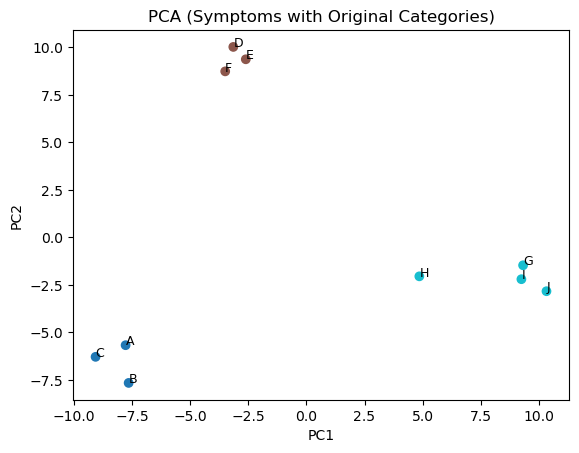

In [124]:
#original categories visualization (example)
symptom_categories = {
    'A': 0, 'B': 0, 'C': 0,
    'D': 1, 'E': 1, 'F': 1,
    'G': 2, 'H': 2, 'I': 2, 'J': 2
}
labels_true = [symptom_categories[col] for col in df.columns]

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_true, cmap='tab10')
for i, label in enumerate(df.columns):
    plt.text(X_pca[i, 0], X_pca[i, 1], label, fontsize=9)
plt.title("PCA (Symptoms with Original Categories)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()